# Load Datasets


In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


# DATA Separation!

In [ ]:
y=df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [ ]:
x=df.drop('logS',axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


Splitting  DATA


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
166,5.31380,257.547,1.0,0.800000
97,-0.92640,126.115,0.0,0.666667
714,-0.77160,151.129,0.0,0.818182
328,0.49100,208.217,4.0,0.000000
191,3.60230,207.070,0.0,0.909091
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


# *Model Building*

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [ ]:
print(y_lr_train_pred,y_lr_test_pred)

[-5.76071748 -0.21138632 -0.56320332 -1.47672665 -4.21552033 -5.33655234
 -5.32589636 -4.7089393  -2.57194987 -1.90324945 -5.02321513 -1.30655385
 -4.94140205 -5.76071748 -1.610082   -0.48583337 -2.81243736 -3.42081155
 -3.76500782 -2.12630913 -2.34746617 -4.47425322 -1.37321128 -3.00263554
 -1.09378855 -2.67067504 -2.04745838 -3.84832952 -3.42081155 -3.90563247
 -1.61731792 -1.65488328 -2.23218649 -2.34270592 -4.02336375 -0.42737422
 -3.74298037 -3.22054052 -3.29878574 -3.49962987 -0.70813304 -4.63447041
 -2.54118351 -1.56708316  0.10143769 -2.05929668 -2.51119515 -5.15394258
 -3.81239337 -2.08068271 -3.10592638 -5.08339507 -4.5569984  -0.56833521
 -2.1094789  -0.15568756 -2.17445427 -3.91687761 -7.89695189 -1.74991439
 -3.92357517 -1.17828918 -5.41457689 -0.36236626 -5.15565764 -6.56241229
 -2.38687719 -3.66387422 -1.11380224 -1.56874915 -1.06478876 -2.1565049
 -1.35432355 -1.67407588 -5.54540425 -4.40218784 -6.19101177 -5.76760504
 -5.41472896 -2.14919936 -2.4063559  -1.19738523 -2.

#### Evaluate Model performance





In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
lr_train_mse = mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2  = r2_score(y_train,y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2  = r2_score(y_test,y_lr_test_pred)

print('LR MSE (Train):',lr_train_mse)
print('LR MSE (Train):',lr_train_r2)
print('LR MSE (Train):',lr_test_mse)
print('LR MSE (Train):',lr_test_r2)

LR MSE (Train): 1.0529225546973289
LR MSE (Train): 0.7594328521298884
LR MSE (Train): 0.9134877174659213
LR MSE (Train): 0.7935230672635001


In [ ]:
lr_results = pd.DataFrame(['Linear regression',lr_test_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()

lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.913488,0.759433,0.913488,0.793523


### Random Forest:

In [ ]:
#training the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [ ]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
rf_train_mse = mean_squared_error(y_train,y_rf_train_pred)
rf_train_r2  = r2_score(y_train,y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test,y_rf_test_pred)
rf_test_r2  = r2_score(y_test,y_rf_test_pred)

print('RF MSE (Train):',rf_train_mse)
print('RF MSE (Train):',rf_train_r2)
print('RF MSE (Train):',rf_test_mse)
print('RF MSE (Train):',rf_test_r2)

rf_results = pd.DataFrame(['Linear regression',rf_test_mse,rf_train_r2,rf_test_mse,rf_test_r2]).transpose()

rf_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
rf_results

RF MSE (Train): 1.013169256262458
RF MSE (Train): 0.7685155121795209
RF MSE (Train): 1.19206641036365
RF MSE (Train): 0.7305555276507825


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.192066,0.768516,1.192066,0.730556


### Comparison models




In [ ]:
df_models = pd.concat([lr_results,rf_results],axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.913488,0.759433,0.913488,0.793523
1,Linear regression,1.192066,0.768516,1.192066,0.730556


#Data VIsualization

[]

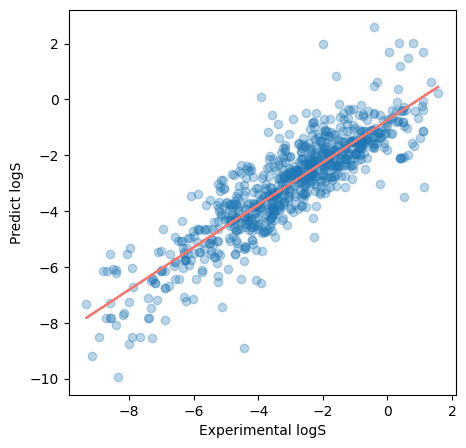

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=y_train,y=y_lr_train_pred,alpha=0.3)
z=np.polyfit(y_train,y_lr_train_pred,1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict logS')
plt.xlabel('Experimental logS')
plt.plot()